# ATU - Programming and Scripting Project 2023

### Author: Norbert Antal

## **Summary of the Iris Dataset**
<br><br>

## **Introduction**
<br>
The Iris flower data set, also known as Fisher’s Iris data set, is a multivariate data set that was introduced by British statistician and biologist Ronald Fisher. <br>The data was collected by Edgar Anderson to quantify the morphologic variation of Iris flowers of three related species and was utilised by Fisher to demonstrate the use of linear discriminant analysis in his 1936 paper titled “The use of multiple measurements in taxonomic problems” published in the Annals of Eugenics.
<br>Today the dataset is widely used as a typical test case for statistical classification in machine learning.<br> 
The Iris dataset contains 50 samples of three Iris flower species: Iris setosa, Iris virginica, and Iris versicolor. Each sample has four features measured in centimetres: sepal length and width and petal length and width. Using these four variables, Ronald Fisher developed a linear discriminant model to differentiate between the species.<br>
(ref: https://en.wikipedia.org/wiki/Iris_flower_data_set )



### **Python Program **(analysis.py)** for analysis of the Iris data**

A Python program **analysys.py** can be found and executed from the root directory (assuming Python is installed on the PC). 

The program starts with a user menu where the main functions of the program can be accessed:

USER MENU:

1. Data validation
2. Summary of each variable
3. Display and save a histogram for each variable
4. Display a scatter plot of each pair of variables
5. Conditional means
6. Correlation - Heatmap
7. Measurement distribution - BoxPlot
8. Classifier routine

The relevant *Program menu* will be noted under the title of each section of the analysis.<br>
Output from the program is saved in the root folder. Filenames will be noted at the relevant sections as well.

## **Preparation**

### Software used for this project

+ VS Code editor
+ Python version 3.9.13 with imported libraries:
  + *pandas* - for data manipulation and analysis (ref: https://en.wikipedia.org/wiki/Pandas_(software))
  + *matplotlib* - for creating graphical representation of data (ref: https://en.wikipedia.org/wiki/Matplotlib)
  + *seaborn* - also for graphical data representation with extended functionality and styling options (ref: https://en.wikipedia.org/wiki/Matplotlib)

### Data source:
Source files downloaded from https://archive.ics.uci.edu/ml/datasets/iris 
The source file **iris.data** is in a comma-separated value file format without headers, **iris.names** is a brief description of the dataset which contains information regarding the headers for the data. 

### Reading in data
Data will be analysed using mainly Pandas which is a popular data analysis library in Python that provides user-friendly data structures and data analysis tools. The comma separated value file is converted to Pandas DataFrame which is a two-dimensional table with labelled columns and rows, similar to a spreadsheet. (ref: https://towardsdatascience.com/a-python-pandas-introduction-to-excel-users-1696d65604f6)

Iris flower measurement values are imported from **iris.data**, header lables added manually from the data description in **iris.names** and the two combined into a pandas dataframe. <br>

In [1]:
# ------------- load modules  --------------
import pandas as pd # for data analysis and dataframe
import matplotlib.pyplot as plt # for creating graphical representation of data
import seaborn as sns # for creating graphical representation of data
import os # for the clear screen function

#----read in data and give headers to each column, creating a dataframe-----------------------
SOURCEDATA="iris.data" # store path of source file in global variable (file is in the same folder so only file name here)
#----read in data and add headers to each column-----------------------
headers=[ #adding headers to dataframe (later reused as global variable for filtering) (headers taken from iris.names)
    "sepal length (cm)", 
    "sepal width (cm)", 
    "petal length (cm)", 
    "petal width (cm)",
    "species"]
df=pd.read_csv(SOURCEDATA, names=headers) # creating dataframe
# store species names globally for later use in filtering 
irises = df['species'].unique() #unique function ref: https://www.educative.io/answers/what-is-the-unique-function-in-pandas


## **Data validation and structure**
#### (Program menu: 1.)

The resulting dataframe is checked for anomalies such as missing or Null entries or unsuitable data formats and general information on its structure<br>

In [2]:
# 1.---- Data Validation -------------
# commands to check for anomalies and to show the created dataframe structure
# ref: https://www.tutorialspoint.com/exploratory-data-analysis-on-iris-dataset
def fn_datavalidation(): 
    print("\n-------> dataframe structure: \n")
    print(df.head()) # first 5 lines of data
    print("\n-------> dataframe info: \n")
    print(df.info()) #outputs column names, count of non-null values and datatypes
    print("\n-------> Checking for Null entries: \n")
    print(df.isnull().sum()) #outputs the number of null entries in the dataframe
    print("\n")
#-------------------------end of function

fn_datavalidation()


-------> dataframe structure: 

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

       species  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa  

-------> dataframe info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (

The generated dataframe information indicates that the dataframe contains 150 value entries per column, 4 columns contain floating point numbers and one contains text data and there is an added index column that is assigned by pandas automatically when creating the dataframe. (Automatic indexing ref: https://blog.hubspot.com/website/pandas-indexing)
In the subsequent check "Checking for Null entries", it was found that there are no Null entries in the dataframe. <br> Null entries can cause unexpected results with calculations, comparison of data and pandas functions. (Dealing with Null values ref: https://medium.com/geekculture/dealing-with-null-values-in-pandas-dataframe-1a67854fe834)
Output shows that the added headers make logical sense, floating point numbers are under flower measurements and species names are under species.<br>
The dataframe appears to be ready for further analysis.

## **Project task 1. Output a summary of each variable to a single text file**
#### (Program menu: 2.) - Output saved in **summary.txt**
<br>
Pyton's Pandas describe() method returns a description of the data in the DataFrame. The description (provided that the data is numeric) contains the following information: 

+ count - The number of not-empty values.
+ mean - The average (mean) value.
+ std - The standard deviation.
+ min - the minimum value.
+ 25% - The 25% percentile*.
+ 50% - The 50% percentile*.
+ 75% - The 75% percentile*.
+ max - the maximum value.

(ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
(ref: https://www.w3schools.com/python/pandas/ref_df_describe.asp#:~:text=The%20describe()%20method%20returns,std%20%2D%20The%20standard%20deviation)

In [3]:
def fn_textsummary(): 
    #describe ref: (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
    #output to string ref: https://stackoverflow.com/questions/31247198/python-pandas-write-content-of-dataframe-into-text-file
    print(f"THE SUMMARY OF EACH VARIABLE IN THE IRIS DATASHEET:\n\n{df.describe().to_string()}")
    print(f"\n\n\nTHE SUMMARY OF EACH VARIABLE BY SPECIES IN THE IRIS DATASHEET:\n")
    for i in irises: #irises is a global variable containing species names only
        #lookup/conditional filtering ref: https://www.kdnuggets.com/2022/12/five-ways-conditional-filtering-pandas.html
        # anatomy: dataframe.LOC[dataframe[lookuparray] == lookupvalue][returnarray].function() or functions
        print(f"\n\t\t\t\t\t{i}\n\n{df.loc[df['species']==i][headers[0:4]].describe().to_string()}\n") 
    print("\nOutput also saved in summary.txt\n") # tell user where to find output file
    with open('summary.txt','w') as f: #write formatted summaries to file
        f.write(f"THE SUMMARY OF EACH VARIABLE IN THE IRIS DATASHEET:\n\n{df.describe().to_string()}")
        f.write(f"\n\n\nTHE SUMMARY OF EACH VARIABLE BY SPECIES IN THE IRIS DATASHEET:\n")
        for i in irises:# write formatted summaries for each species using lookup/conditional filtering
            f.write(f"\n\t\t\t\t\t{i}\n\n{df.loc[df['species']==i][headers[0:4]].describe().to_string()}\n")
            print(f"\n\t\t\t\t\t{i}\n\n{df.loc[df['species']==i][headers[0:4]].describe().to_string()}\n")
#-------------------------end of function
fn_textsummary()

THE SUMMARY OF EACH VARIABLE IN THE IRIS DATASHEET:

       sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
count         150.000000        150.000000         150.000000        150.000000
mean            5.843333          3.054000           3.758667          1.198667
std             0.828066          0.433594           1.764420          0.763161
min             4.300000          2.000000           1.000000          0.100000
25%             5.100000          2.800000           1.600000          0.300000
50%             5.800000          3.000000           4.350000          1.300000
75%             6.400000          3.300000           5.100000          1.800000
max             7.900000          4.400000           6.900000          2.500000



THE SUMMARY OF EACH VARIABLE BY SPECIES IN THE IRIS DATASHEET:


					Iris-setosa

       sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
count           50.00000         50.000000          50.000000

Initial summary reveals that there are 150 values for each measurement which makes later comparisons easier. It also shows that based on the standard variation (std) figures, sepal width values have the lowest variation and the petal length values have the highest. However, this summary doesn't separate the data by species.
<br>The describe() method iterated through each of the species provides a more comprehensive view of the data. It shows that every species have an equal number of samples (50) for each of the 4 measurements. This will allow direct comparison without truncating for example. <br>
The resulting data could be used for further analysis but at first glance, differences between species are not significant enough to rely on numeric analysis alone. Graphical representation of the data is more suitable to highlight the differences and similarities and find correlations in the data.

*As per the project task description, the results of the summary analysis are saved into a text file (<summary.txt>) that includes both an overall summary of the data and a species-specific summary.*

## **Project task 2. Create histogram of each variable and save results in png files**
#### (Program menu: 3.) - output saved in separate image files in **<*measurement*.png> (e.g. <sepal width (cm).png>)** format

A histogram is a plot that shows frequency distribution (shape) of a set of values. (ref: https://statistics.laerd.com/statistical-guides/understanding-histograms.php) 
<br>A histogram in the context of the Iris dataset can visualize the distribution of the various measurement values of the dimensions of the petals and sepals of the Iris flower.<br>
Key characteristics of histograms are *peaks* and *spread* that represent the most typical values and how much the data variates, *skewed data* or presence of *outliers* may indicate patterns that could be investigated or errors in the sample.
(ref: https://chartio.com/learn/charts/histogram-complete-guide/)

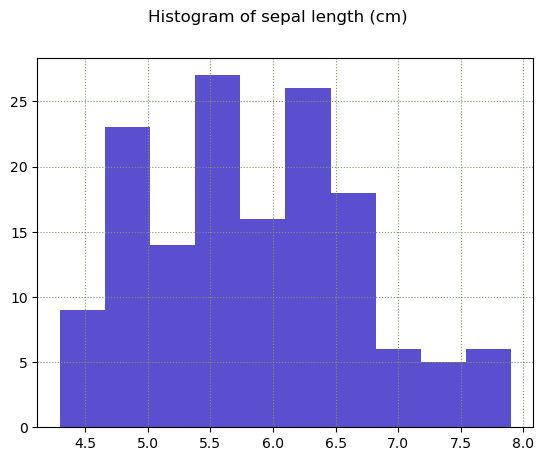


Plot saved as <sepal length (cm).png>



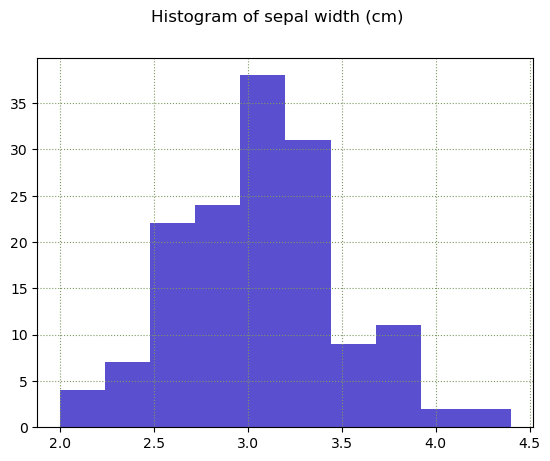


Plot saved as <sepal width (cm).png>



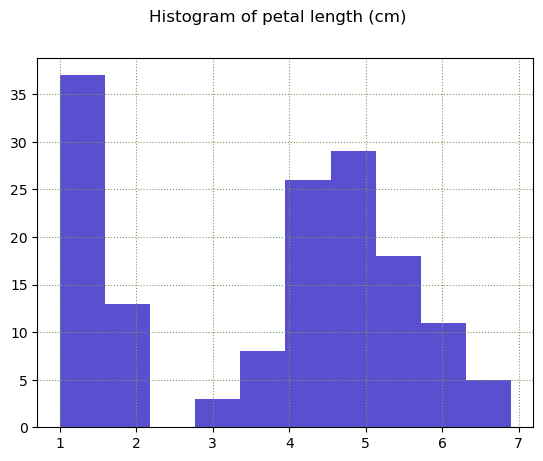


Plot saved as <petal length (cm).png>



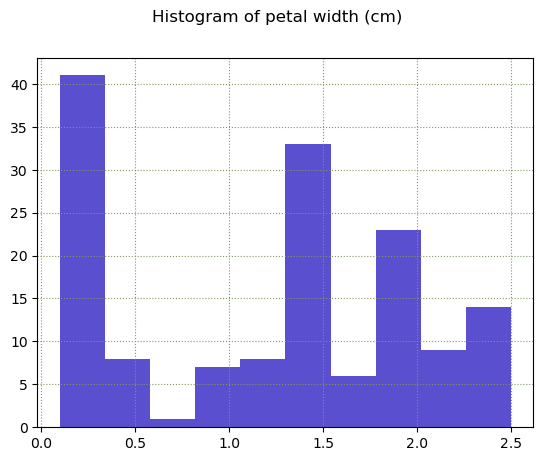


Plot saved as <petal width (cm).png>



In [4]:
# 3.------- Create histogram of each variable and save results in png files  - 2 segments A, B
    
    # 3A. ------First set up histogram template
def fn_pnghist(column): # part of histogram sequence - draws one histogram with column name stored in column argument
    # ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html
    # ref: https://www.geeksforgeeks.org/how-to-set-plot-background-color-in-matplotlib/
    # ref: https://matplotlib.org/stable/tutorials/introductory/customizing.html
    plt.style.use('fast') # select style from style galery
    plt.grid(True, color="#7e9964", linestyle="dotted") # set grid on + style and colour
    df[column].hist(bins=10, color="#5a4fcf") # draw histogram for each column with column name taken from argument
    plt.suptitle(f"Histogram of {column}")
    plt.savefig(f"{column}.png") # save plot ref: https://chartio.com/resources/tutorials/how-to-save-a-plot-to-a-file-using-matplotlib/
    plt.show() # turns out plt.show() must be left in the end of the function to avoide having all histograms on one plot 💁
    print(f"\nPlot saved as <{column}.png>\n") # user feedback - display filename so user knows what to look for
#-------------------------end of function
    
    # 3B. ------Iterate template through each measurement column;
        # by calling the 'fn_pnghist' function to draw the histograms with each variable as per their column label
def fn_makehists():
    cols=headers[:-1] # created shorter list from 'headers' to avoid including the 'species column' that is not one of the measurements short list stored in 'cols'
    for c in cols: # loop through list and store header names
        fn_pnghist(c)
#-------------------------end of function
#--------------------end of segment 3.
fn_makehists()

+ **Histogram of sepal lengths (cm)**
    The histogram is quite widely spread, slightly skewed to the left towards the smaller values which indicates that sepals with less than the median length are more common than long ones. The data shows three distinct peaks indicating sepal lengths around 5.5cm to be the most common but peaks of sample lengths just under 5cm and between 6.0 and 6.5cm are a frequent occurrence as well.
+ **Histogram of sepal width (cm)**
    This histogram is almost symmetric indicating close to normal distribution and has a narrow spread which is not surprising as standard deviation is the smallest in this category at 0.433594. 
+ **Histogram of petal length (cm)**
    This is a bimodal histogram with two distinct peaks or modes, one at the extreme left indicating numerous samples with short petals while the other peak is at 4-5cm with a wider base with an almost normal distribution shape. Multimodal histograms could indicate subgroups in the dataset.
+ **Histogram of petal width (cm)**
    This a multimodal histogram although similarly to the previous histogram, there is a distinct cluster at the extreme left showing a significant number of samples with narrow petals, the remaining samples are gathering in an almost separate multimodal shape with multiple peaks.

Since the data is not separated by species the resulting histograms are more suitable to identify outliers and errors, but it is worth noting that both histograms representing petal measurements (see: *petal length (cm).png* and *petal width (cm).png*) show a distinct cluster of samples with short and/or narrow petals. 

## **Project task 3. Output a scatter plot of each pair of variables**
#### (Program menu: 4.) - Output saved in **<pairplot.png>** and **<sepal_petal.png>**

A scatter plot uses dots to represent values of two numeric variables, with each dot indicating the values of an individual data point on the horizontal and vertical axis. It is used to visualize relationships between variables.  (ref: https://chartio.com/learn/charts/what-is-a-scatter-plot/) <br>
Pairplot from the Seaborn library of Python is used for creating a grid of scatter plots and histograms, visualizing the pairwise relationships in a dataset. (ref: https://seaborn.pydata.org/generated/seaborn.pairplot.html) The comparison is made easier by having all the pairs of measurements plotted side by side using subplots. Where the same measurement paired, a histogram is drawn. The three separate species are colour coded in order to distinguish which measurement belongs to which Iris species. *(<pairplot.png>)* <br>

In [5]:
# 4.------ Display a scatter plot of each pair of variables - 3 segments A, B, C
    # 4A.------Pair plot for each pair of measurements
def fn_pairplot(): #pairplot ref: https://www.youtube.com/watch?v=b7JuBsswDlo&t=45s
    plt.style.use('fast') # set style
    sns.pairplot(df, hue="species")  # create pairplot ref: https://seaborn.pydata.org/generated/seaborn.pairplot.html
    specfont1 = {"family":"serif","color":"#4a6741",'weight':'bold',"size":14} # set font style
    plt.suptitle("Pair plot of measurements in the Iris dataset", fontdict=specfont1) # set title
    plt.subplots_adjust(top=0.95) # reducing size of the plot to make more room for the title.
    #------output to -png
    plt.savefig(f"pairplot.png")
    plt.show(block = False)
    #plt.pause(7) #plot only showed in jupyter, workaround ref: https://pythonguides.com/matplotlib-not-showing-plot/
    #plt.close('all') # this is not ideal but program stucks otherwise
    print("Plot saved as <pairplot.png>")
#-------------------------end of function

    # 4B.------ Display a scatter plot for sepal and petal measurement pairs separately
def fn_sepal_petal():
    #-----Set plot style 
    plt.style.use('fast') #ref: https://matplotlib.org/stable/gallery/style_sheets/index.html
    plt.rc("font", family="serif")# default text style ref: customise default style ref: https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
    #-----two plots side by side ref: https://realpython.com/python-matplotlib-guide/#subplots, ref: https://stackoverflow.com/questions/42818361/how-to-make-two-plots-side-by-side
    fig, axes = plt.subplots(ncols=2, figsize=(12, 6)) #create a plot object with 2 subplots (specified in 'ncols') and set plotsize 12x6
    #-----1. draw scatter plot for sepal variables which are the first two headers stored in 'ax_x' and 'ax_y'
    ax_x = headers[0] #"sepal width (cm)"
    ax_y = headers[1] #"sepal length (cm)"
    sns.scatterplot(data=df, x=ax_x, y=ax_y, hue='species', ax=axes[0])
    #-----labels and title for above
    axes[0].set_xlabel(ax_x)
    axes[0].set_ylabel(ax_y)
    axes[0].set_title("Sepal Measurements")
    #-----2. draw scatter plot for petal variables which are the next two headers stored in 'ax_x' and 'ax_y'
    ax_x = headers[2] #"petal width (cm)"
    ax_y = headers[3] #"petal length (cm)"
    sns.scatterplot(data=df, x=ax_x, y=ax_y, hue='species', ax=axes[1])
    #-----labels and title for above
    axes[1].set_xlabel(ax_x)
    axes[1].set_ylabel(ax_y)
    axes[1].set_title("Petal Measurements")
    #------output to -png
    plt.savefig(f"sepal_petal.png")
    plt.show()
    print("Plot saved as <sepal_petal.png>")
#-------------------------end of function

    # 4C.------- display and save both versions of the scatter plots
def fn_scatters():
    fn_sepal_petal()# run sepal and petal scatterplots first
    fn_pairplot() # then pairplot
#-------------------------end of function
#--------------------end of segment 4.

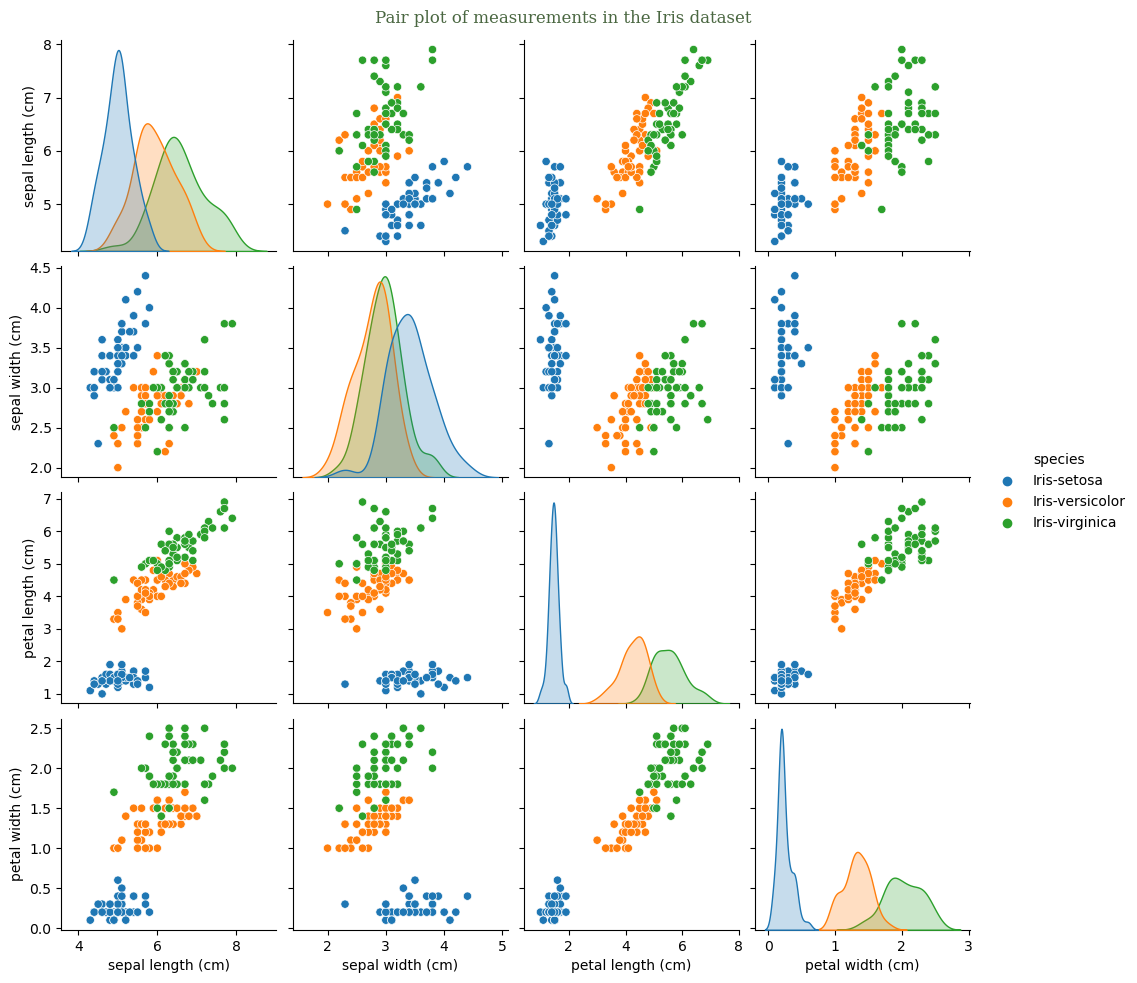

Plot saved as <pairplot.png>


In [6]:
fn_pairplot()

The pairplot demonstrates that Iris-setosa measurements are showing in their own cluster on multiple plots while versicolor and virginica have overlapping measurements in all.

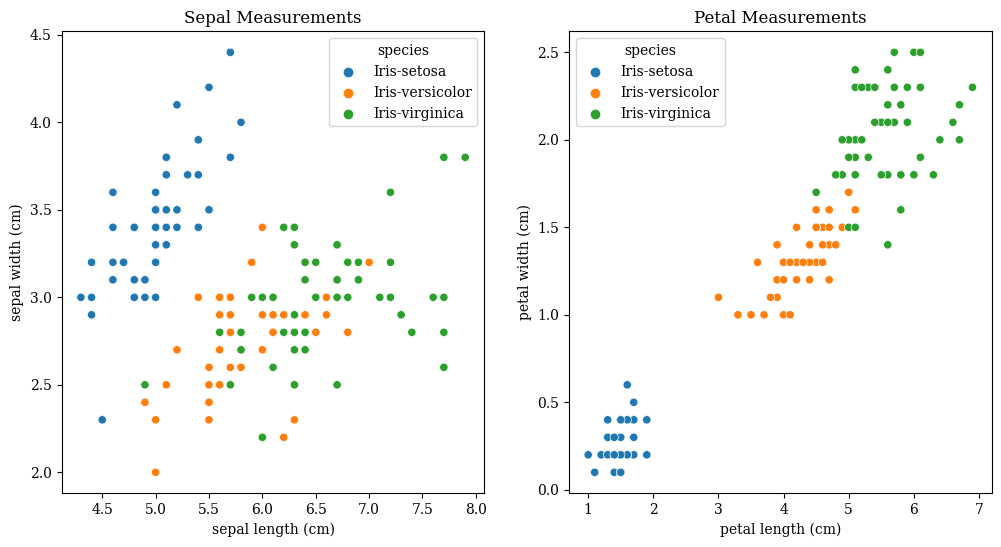

Plot saved as <sepal_petal.png>


In [7]:
fn_sepal_petal()

When comparing petal and sepal measurements in pairs side by side on a separate plot *(<sepal_petal.png>)*, it is apparent that there is considerable overlap in sepal length and width across the different species. However, in terms of petal measurements, Iris-setosa is clearly separated having the smallest petals, while the majority of the versicolor and virginica samples are also distinct, with only slight overlap between them. Virginica noticeably having the largest petals, both in terms of length and width.
According to the scatter plots, the most effective pair of measurements for distinguishing between the three Iris species is petal width and length.<br>
Scatter plots can also indicate correlation between pairs of variables as demonstrated on the Petal Measurements scatter plot *(<sepal_petal.png>)*, where a correlation between petal length and width can be observed, revealing that the longer petals tend to be wider as well.<br>

## **Project task 4. Any other analysis**

### **Conditional means**
#### (Program menu: 5.) - Output saved in **<condmeans.png>**

The "Conditional Means" (condmeans.png) plot is a direct repurposing of a sample plot from the seaborn plot gallery. 
It is combining a strip plot for each of the flower measurement values and point plot for each of the means figures for each of the values grouped by species.

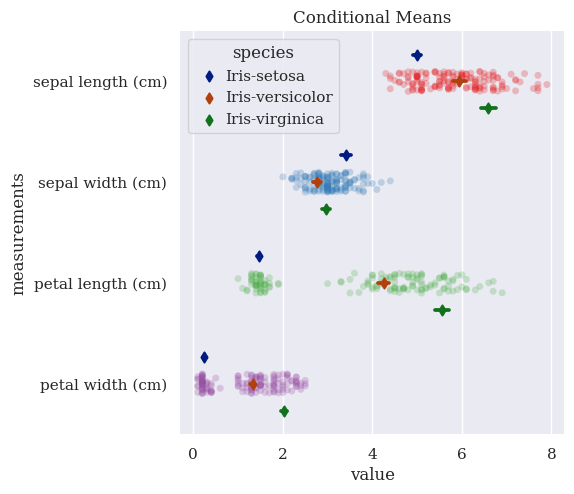

Plot saved as <condmeans.png>


In [8]:
def fn_condmeansext():
    sns.set_theme(style="darkgrid", font='serif') # set style
    # "Melt" the dataset to "long-form" or "tidy" representation
    iris = pd.melt(df, "species", var_name="measurements") # this will put all measurements into one column
    # Initialize the figure
    f, ax = plt.subplots()
    sns.despine(bottom=True, left=True)
    # Show each observation with a scatterplot
    sns.stripplot( 
        data=iris, x="value", y="measurements", palette="Set1",
        dodge=True, alpha=.25, zorder=1
    )
    # Show the conditional means, aligning each pointplot in the
    # center of the strips by adjusting the width allotted to each
    # category (.8 by default) by the number of hue levels
    sns.pointplot(
        data=iris, x="value", y="measurements", hue="species",
        join=False, dodge=.8 - .8 / 3, palette="dark",
        markers="d", scale=.75, errorbar=None
    )
    plt.subplots_adjust(top=0.95,left=0.3) # adjusting plot to fit title and labels
    ax.set_title("Conditional Means") # set title
    # Improve the legend
    sns.move_legend(
        ax, loc="upper left", ncol=1, frameon=True, columnspacing=1, handletextpad=0
    )    
    plt.savefig("condmeans.png") # save plot as png
    plt.show()
    print("Plot saved as <condmeans.png>") #inform user what the file name is.

# end of function
fn_condmeansext()

 The chart indicates the distinction of Iris-setosa values once again but it doesn't reveal additional information about the data, certainly can't assist with the distinction of the other two species. 

### **Correlation - Heatmap**
#### (Program menu: 6.) - Output saved in **<heatmap.png>**

Correlation between the different columns of the data can be calculated using pandas .corr() function which is using the Pearson method as default. (ref: https://zion-oladiran.medium.com/exploratory-data-analysis-iris-dataset-68897497b120)  
The Pearson correlation coefficient, takes a value between -1 and 1, measures linear correlation. A coefficient of 1 indicates positive correlation, while a coefficient of -1 indicates negative correlation. A coefficient of 0 means that the two variables likely have no effect on each other. (ref: https://www.scribbr.com/statistics/pearson-correlation-coefficient/#:~:text=The%20Pearson%20correlation%20coefficient%20(r,the%20relationship%20between%20two%20variables.) 


Correlation matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.109369           0.871754   
sepal width (cm)           -0.109369          1.000000          -0.420516   
petal length (cm)           0.871754         -0.420516           1.000000   
petal width (cm)            0.817954         -0.356544           0.962757   

                   petal width (cm)  
sepal length (cm)          0.817954  
sepal width (cm)          -0.356544  
petal length (cm)          0.962757  
petal width (cm)           1.000000  


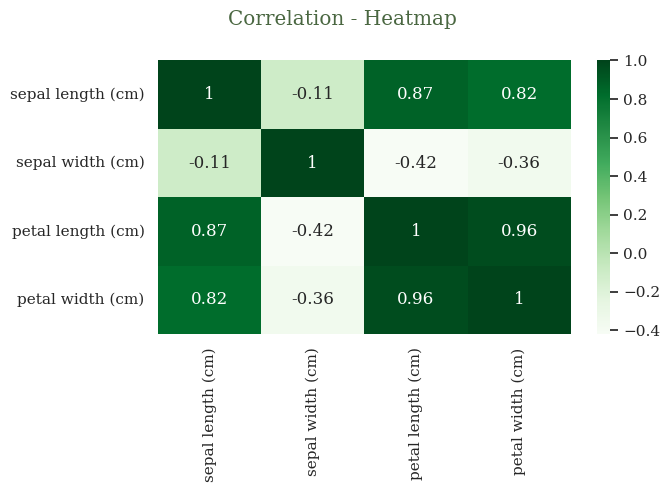

Plot saved as <heatmap.png>


In [9]:
# 6.------ Correlation - Heatmap
def fn_heatmap():
    # correlation heatmap ref: https://zion-oladiran.medium.com/exploratory-data-analysis-iris-dataset-68897497b120
    correlation = df.corr() # calculate correlation with corr() ref: https://www.geeksforgeeks.org/python-pandas-dataframe-corr/
    # text report
    print(f"\nCorrelation matrix:\n{correlation}")
    # title 
    plt.figure(figsize=(7,5)) # set figure size
    plt.subplots_adjust(top=0.90,left=0.2, bottom=0.28) # adjusting plot to fit title and labels
    plt.suptitle("Correlation - Heatmap", fontdict={"family":"serif","color":"#4a6741",'weight':'bold',"size":12})# set title and style
    # heatmap
    sns.heatmap(correlation, annot=True, cmap='Greens') # render heatmap
    plt.tight_layout() # prevent lable overlaps
    # save to file
    plt.savefig("heatmap.png")
    plt.show()
    print("Plot saved as <heatmap.png>") # userfeedback - file name
#-------------------------end of function
fn_heatmap()

The resulting correlation matrix is displayed in terminal output however, a graphical representation of the matrix with a heatmap does help to recognize relevant patterns in the data.
A heatmap plot is a two-dimensional data-representation in which values are represented by colours to show relationships between two variables, one plotted on each axis. (ref: https://chartio.com/learn/charts/heatmap-complete-guide/)
<br>Such plot can be used for the representation of a correlation matrix, showing the relationships between pairs of variables as a grid of coloured squares. Each square's colour represents the value of the correlation coefficient.
Using seaborn's heatmap plot function the resulting heatmap (<heatmap.png>) reveals that there is a strong positive correlation (0.96) between petal length and petal width, as well as between sepal length and petal length and width (0.87 and 0.82).<br>
This indicates that the larger petals retain their proportions as they grow in size since the wider they are their length increases. Also revealed that a flower with a longer sepal will likely have a larger petal. 
Sepal width has a weak negative correlation with petal length and petal width. This suggests that the sepals may become slightly narrower as the petals grow in size. 

### **Petal Length and width measurement distribution among the species - Box plot**
#### (Program menu: 7.) - Plot saved in **<boxplot.png>**, petal measurement ranges for each species output to the terminal
<br>
A boxplot (or box and whisker plot) is the visualisation of data distribution based on five attributes; minimum, first quartile, median, third quartile and maximum. (ref: https://builtin.com/data-science/boxplot) The box represents the central 50% of the data with a line representing the median value, while the whiskers cover the remaining range of the data. Outliers are plotted outside the whiskers range as individual points. ˙ref: https://chartio.com/learn/charts/box-plot-complete-guide/)

Iris-setosa 
      petal length (cm)  petal width (cm)
min                1.0               0.1
max                1.9               0.6
Iris-versicolor 
      petal length (cm)  petal width (cm)
min                3.0               1.0
max                5.1               1.8
Iris-virginica 
      petal length (cm)  petal width (cm)
min                4.5               1.4
max                6.9               2.5

 Plot saved as <boxplot.png>



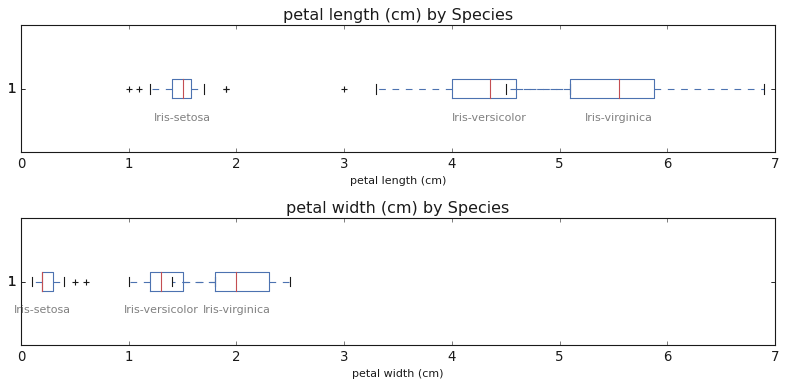

In [10]:
# 7.------------------Measurement distribution box plot
def fn_boxplot():
    # print a list of petal measurement ranges (min/max) per species:
        # pandas tutorial to filter data ref: https://www.youtube.com/watch?v=vmEHCJofslg&t=111s
        # limit describe output to min and max ref: https://stackoverflow.com/questions/19124148/modify-output-from-python-pandas-describe, 
    for i in irises: #irises is a global variable containing species names only
        # filter/lookup anatomy: dataframe.LOC[dataframe[lookuparray] == lookupvalue][returnarray].function() or functions
        # this lookpup filters petal lenght and width (header[2:4]) where species equals to the current iteration in the irises loop 
        # then applies two arguments (min and max) of the describe() function
        # prints the iterations of the loop (species name) the header names and the min/max value for each iteration
        print(i,'\n',df.loc[df['species']==i][headers[2:4]].describe().loc[['min','max']]) 

    # plot the boxlplot:
    #ref: https://www.youtube.com/watch?v=q68Qundmans&t=3076s
    #ref: https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
    plt.style.use("classic") # ref galery: http://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html
    pL = headers[2] #"petal length (cm)"
    pW = headers[3] #"petal width (cm)"
    fig, axs = plt.subplots(2, 1, figsize=(10, 5), facecolor='white') # plotting 2 subplots on top of each other, classic with white background

    for i in irises: # iterating through species #irises is a global variable containing species names only
        petal_lengths = df.loc[df['species'] == i][pL] #filter to petal lenghts per species
        petal_widths = df.loc[df['species'] == i][pW] #filter to petal widths per species
        med_petal_lengths = df.loc[df['species'] == i][pL].median() # minimum petal lenghts per species for label position
        med_petal_widths = df.loc[df['species'] == i][pW].median() # minimum petal widths per species for label position
        # top plot 
        axs[0].boxplot(x=petal_lengths, vert=False) # draw boxplot of lenghts, place it horizontally
        axs[0].set_title(f"{pL} by Species") # set title from variables
        axs[0].set_xlabel(pL,size='smaller') # # set axis lable from variables
        axs[0].set_xlim(0,7) # Aligning the two axes to make comparison easier
        axs[0].text(med_petal_lengths,0.75,f'{i}', color='grey', size='small', ha='center') # set, position and style labels
        
        # bottom plot
        axs[1].boxplot(x=petal_widths, vert=False)
        axs[1].set_title(f"{pW} by Species")
        axs[1].set_xlabel(pW, size='smaller')
        axs[1].set_xlim(0,7) 
        axs[1].text(med_petal_widths,0.75,f'{i}', color='grey', size='small', ha='center') 

    plt.tight_layout()
    plt.savefig("boxplot.png")
    print("\n Plot saved as <boxplot.png>\n")
    plt.show()
#-------------------------end of function
fn_boxplot()

As previous visualisations demonstrated, petal measurements are the most useful to distinguish the species therefore the box plot only focuses on petal lenght and width divided into two horizontal subplots arranged vertically. The three species are plotted on the same subplot for easier comparison. 
Once again, Iris-setosa shown completely separately on both subplots, just as it did in the scatter plots. The other two species also demonstrate the same overlap as before.<br>
However, unlike the scatter plot, although very informative with regards to individual datapoints, the box plot provides a comprehensive picture of the data distribution as well, showing the median, typical values, and outliers.
Typical values or the central 50% of the datapoints show distinction between versicolor and virginica although 

Since the petal length data gives a wider range of values than the petal width data, it is more suitable to focus on the petal lengths for classification purposes.

## **Summary and proposed practical use of findings**
#### (Program menu: 8. Classifier routine) Classification result output to terminal and displayed on a box plot visualization saved as **<ClassificationResult.png>**

This project analysed Fisher's Iris dataset, originally published in 1936 describing 3 species of the Iris flower.
The data was downloaded and converted into a dataframe and after an initial "health-check" it was analysed using Python's pandas library. Matplotlib and seaborn libraries were used to visualize of the data.
The summary of each variable has not revealed anything useful although in retrospect petal length already noticeable with the highest standard deviation figure indicating the widest variation of values. Grouping the data per species did provide further insight in but without graphical illustration it was difficult make sense of the figures.
First visualization was a histogram for each measurement. It revealed that petal measurements produce bi- and multimodal histograms suggesting possible grouping within the data especially on the lower range of values.
The pair plot produced from the data creating a grid of scatter plots and histograms was much more revelative. Petal measurements for Iris-setosa very clearly stand apart while the other two species show some overlap. A positive correlation between petal length and width was also revealed.<br>
In further analysis a conditional means plot reinforced the separation of Iris-setosa samples.
A correlation analysis and the resulting heatmap plot supported the notion that the petals keep their proportions as they get bigger since length and width, and it is also indicated that flowers with larger petals are likely to have longer sepals.
As previously the sepal data proven to be ambiguous, the last visualization focused on petal measurements only.
The two box plots visualised minimum and maximum measurements and the outliers and revealed that the typical measurements for the species do stand apart even in the case of Iris-virginica and versicolor.

### **Findings:**

+ Only one of the three Iris species; Iris-setosa can be clearly separated based on the minimum and maximum size of petals.
+ While the other two species have overlapping data for petal dimensions, the analysis was able to establish a range for typical petal lengths and widths for the three species and visualised on a box plot: 
  + Iris-setosa typical petal length is between 1.4-1.58cm, 
  + Iris-versicolor is between 4.0-4.6cm and 
  + Iris-virginica petal length is between 5.1-5.88cm. 
+ A strong correlation demonstrated on scatter plots and heatmap visualization between petal widths and lengths indicate that across the three species the petals keep their proportions regardless of overall size.
+ A correlation demonstrated on a heatmap plot suggests that iris flowers with bigger petals likely to have longer sepals.

### + Practical use of the data:
##### (Program menu: 8. Classifier routine)

For a task of identifying species in future samples of Iris flowers without counting chromosomes we can use the min and max measurements of petal length for each species to separate them and leave only the overlapping ones for chromosome counting.
It is also possible to identify typical samples based solely on the Iris petal length data.
Based on petal measurements grouped by species a classifier routine was created <br>**(Program menu: 8. Classifier routine)**
<br>Since petal lengths have a much wider variety it was chosen to be the basis of classification.
The program functions as follows:<br>
The user can receive the species name based on petal length value.
The species is determined by the petal length falling within the range of the minimum and maximum values of that species.
The result is displayed on the terminal. <br>The output text is updated dynamically based on whether the sample matches any of the species' petal lengths.
If there is no match, the text indicates this and lists the minimum and maximum ranges for each species' petal lengths.
If the sample falls within an overlapping range, both relevant species are listed.
Finally, if sample value falls within a species' typical range, the output text indicates this as well.<br>
The program is complete with a box plot that displays the ranges of each species and the relative position of the new sample data.
<br>*Classification result displayed on the terminal and visualized on a box plot saved as **<ClassificationResult.png>**.*


✕

                        Sample 46.0 is out of range
    No matching species in the dataframe for that sample size
        

 		Classification criteria: 

            species  Petal Lenght min  Petal Lenght max
0      Iris-setosa               1.0               1.9
1  Iris-versicolor               3.0               5.1
2   Iris-virginica               4.5               6.9 


Please try again:


The sample is ambiguous 
     could be either Iris-versicolor or Iris-virginica
Result saved as <ClassificationResult.png>


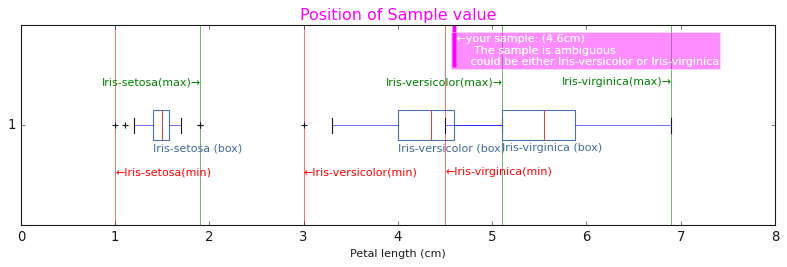

In [11]:
# In analysis.py the functions for the classifier routine were saved as
# a separate file and loaded byck into analysis.py to test if it reduces loading time
    # online references were inconclusive on the matter:
        # Partitioning improves performance ref: https://gamedev.stackexchange.com/questions/203710/does-having-code-spread-in-multiple-files-decrease-performance
        # Partitioning has little effect ref: https://stackoverflow.com/questions/1083105/does-creating-separate-functions-instead-of-one-big-one-slow-processing-time
# It was found that there is no significant change in loading time for analysis.py by partitioning classifier.py (also condmeans.py) to separate files
    # Perhaps the overall amount of code is so little that partitioning has no menaingfull effect.

# ------------Classifier visualisation with box plot
# this function visualises the petal lenght data distribution on a boxplot for each species
# displays plot lines for minimum and maximum range of petal lengths for each species
# also displays the relative position of the sample data taken from the classifier routine including sample classification description
def fn_classifiervisualiser(a_number,text): 
    # argument stores the sample data from user interaction "a_number" and "text" for formated classification result
    pL = headers[2] # store filter to the third column "petal length (cm) in a short named variable "
    plt.style.use("classic") # style galery ref: http://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html
    plt.figure(figsize=(10,3.5),facecolor='white', frameon=True) # set figure siz and style
    plt.title("Position of Sample value", color='magenta') # set figure title
    for i in irises: # loop for each species
        # find and store minimum/max and left side of box value among values that are in the same row as species in the loop in the dataframe
            # (this is for the vertical plotlines and labels positions)
        # a value lookup will return a list of values matching lookup criteria:
            # anatomy: variable=dataframe.LOC[dataframe[lookuparray] == lookupvalue][returnarray]
        min_petal_lengths = df.loc[df['species'] == i][pL].min() # adding min() will result the smallest value from the list 
        max_petal_lengths = df.loc[df['species'] == i][pL].max() # adding max() will result the largest value from the list 
        med_petal_lengths = df.loc[df['species'] == i][pL].quantile(0.25) #left side of the box is the end of the first quantile
        # boxplot ref: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html 
        l_toboxplot=df.loc[df['species'] == i][pL] # get data for boxplot by locating each petal lenght value for each species
        
        plt.tight_layout(pad=0.5) # prevents labels overlapping ref: https://www.statology.org/matplotilb-tight_layout/
        plt.xlim(0,8) # set axis min and max to make room for text, ref: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html
        plt.xlabel("Petal length (cm)", size='small') # set x axis label
        plt.yticks([]) #hide y axle tick label ref: https://www.geeksforgeeks.org/how-to-hide-axis-text-ticks-or-tick-labels-in-matplotlib/
        # plot lines ref: https://www.geeksforgeeks.org/matplotlib-pyplot-axvline-in-python/
        plt.axvline(min_petal_lengths, color='red', linestyle='-',lw=0.5) # minimum petal line
        plt.axvline(max_petal_lengths, color='green', linestyle='-',lw=0.5) #max petal line
        plt.axvline(a_number, color='magenta', linestyle='solid',lw=3, ymin=0.8) # sample value from the classifier, short line ref: https://www.skytowner.com/explore/drawing_a_vertical_line_in_matplotlib
        # plot line lables - plt.text ref: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html
        plt.text(min_petal_lengths,0.75,f'←{i}(min)', color='red', size='small') # min lables
        plt.text(max_petal_lengths+0.01,1.2,f'{i}(max)→', color='green', size='small', ha='right') # max label
        plt.text(med_petal_lengths,0.87,f'{i} (box)', color='#4468a6', size='smaller',ha='left') # med lables
        plt.text(a_number-0.02,1.3, # classifier sample data label with background colour ref: https://stackoverflow.com/questions/17086847/box-around-text-in-matplotlib
                 f' ←your sample: ({a_number}cm)\n      {text}',
                 color='white',bbox=dict(facecolor='magenta', alpha=0.175, edgecolor='white', pad=1.5), 
                 size='small') 
        plt.boxplot(x=l_toboxplot, # as the boxplot is inside the loop, each species values will be plotted on the same axis
            vert=False, # plot horizontally
            whiskerprops={'color':'blue', 'linestyle':'-', 'lw':0.5} #style the whiskers
            )
    plt.tight_layout()
    plt.savefig("ClassificationResult.png")
    print("Result saved as <ClassificationResult.png>")
    plt.show()

# ------------CLassifier routine ----------------------------------
# function description displayed when the function called
def fn_classify():
    os.system('clear')
    while True: # exception handling ref: https://docs.python.org/3/tutorial/errors.html#handling-exceptions
        try:
            sample=float(input(('Please enter the petal length as floating-point number in cm: \n'))) #user defines sample size
            break
        except ValueError:
            print('Error: invalid entry.\n')
    
    display = "✕" # default value to display
    returnme=[] # result container for species names
    petalmeasurements = []# container for min/max petal length range
    typicalmeasurements = []# container for tipical petal length range
    pL = headers[2] # store filter to the third column "petal length (cm) in a short named variable "
    # loop for each species
        # find and store values for lable and plotline locations
        # a value lookup will return a list of values matching lookup criteria:
            # anatomy: variable=dataframe.LOC[dataframe[lookuparray] == lookupvalue][returnarray]
            #for species in df['species'].unique()
    for i in irises: #select species individually to filter data
        l_min = df.loc[df['species'] == i][pL].min() # select minimum petal length for matching species
        l_max = df.loc[df['species'] == i][pL].max() # select maximum petal length for matching species
        boxleft = df.loc[df['species'] == i][pL].quantile(0.25) #left side of the box is the end of the first quantile
        boxright = df.loc[df['species'] == i][pL].quantile(0.75) #right side of the box is the end of the third quantile
        petalmeasurements.append([i, l_min, l_max]) # list container for min/max tresholds 
        typicalmeasurements.append([i, boxleft, boxright]) # container for typical range
    #-create tiny dataframes for lookup ranges
    criteria = pd.DataFrame(petalmeasurements, columns=['species','Petal Lenght min','Petal Lenght max']) 
    typical = pd.DataFrame(typicalmeasurements, columns=['species','typicalmin','typicalmax'])
    #-lookups with sample value
    result = criteria.loc[(criteria['Petal Lenght min'] <= sample) & (criteria['Petal Lenght max'] >= sample)]
    typicalsample = typical.loc[(typical['typicalmin'] <= sample) & (typical['typicalmax'] >= sample)]
    #-classification based on lookup results
    if result.empty: #error handling for out of range samples (ref: https://stackoverflow.com/questions/48558511/create-an-exception-for-empty-dataframe)
        plotme=0 # block boxplot function as there is nothing to plot = out of range procedure
    else: # output if there is a match:
        plotme=1 # unblock boxplot function - within range procedure
        for index, row in result.iterrows(): # iterate for more than one result (ref: https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas)            
            returnme.append(row['species']) #result(s) added to the result lilst
        verdict = " or ".join(returnme) # text to express result is two species
        if len(returnme) == 1: # if result only one species it is checked if within typical range
            if typicalsample.empty:
                display = f"The sample is likely an {verdict}" # if not tipical, say it's likely
            else:
                display = f"The sample is a typical {verdict}" # if it is typical 
        else: # if result is not exactly 1, the sample is ambiguous
            display = f"The sample is ambiguous \n     could be either {verdict}" #format text accordingly
    print(display) # output dynamically formatted text to terminal
    
    if plotme == 1: # 0 = out of range procedure, 1 = within range procedure
        fn_classifiervisualiser(sample,display) # within range: run plot with final result and dynamically formatted text
    else: # out of range: user interaction if sample out of range and run classifier function again.
        os.system('clear')
        print(f'''
                        Sample {sample} is out of range
    No matching species in the dataframe for that sample size
        ''')
        print(f"\n \t\tClassification criteria: \n\n",criteria,"\n\n") # remind user of valid range
        print('Please try again:\n\n') 
        fn_classify() 

# End of classifier with visualisation program
fn_classify()

Possible results:
+ Error: Invalid entry - for non float entries
+ Sample out of range (prompt acceptable range + "try again") - for sample value outside minimum or maximum petal length in Iris data
+ Sample is "species"
+ Sample is a typical "species"
+ The sample is ambiguous could be either "species1" or "species2"

____________________________
___________________________

##### Norbert Antal
##### 08/05/23